In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

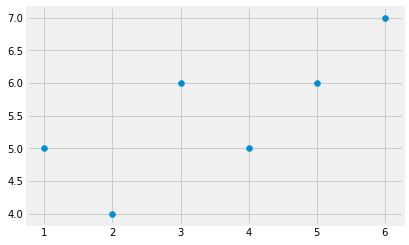

In [2]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

plt.scatter(xs,ys)
plt.show()

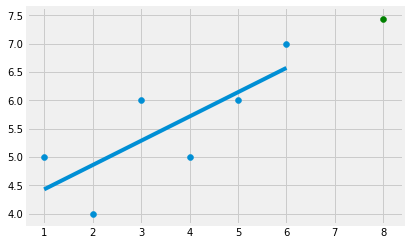

In [3]:
def best_fit_slope_and_intercept(xs,ys):
    m_numerator =  mean(xs)*mean(ys) - mean(xs*ys)
    m_denominator = mean(xs)*mean(xs) - mean(xs**2)
    m = m_numerator/m_denominator
    
    b = mean(ys)-m*mean(xs)
    
    return m,b

m,b= best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,color='g')
plt.plot(xs, regression_line)
plt.show()

# https://www.youtube.com/watch?v=KLGfMGsgP34&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=9

In [4]:
# EVALUATING OUR LINEAR REGRESSION MODEL p11
# R^2 value calculation (R^2 = 1 - SE_Y^/SE_YMean)
    

def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

# R^2 value a.k.a coeff of determ
def coeffecient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line) 
    return 1 - squared_error_regr/squared_error_y_mean
    
r_squared = coeffecient_of_determination(ys,regression_line)
print(r_squared)

0.5844155844155845


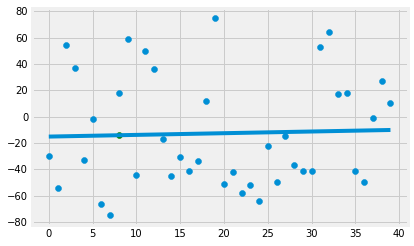

0.0012709683256241222


In [10]:
# TESTING ASSUMPTIONS p12
# test if work correctly on known sample data
import random

def create_dataset(hm, variance, step = 2, correlation = False):

    val = 1
    ys = []
    for i in range(hm):
        y = val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs = [i for i in range(len(ys))]
    return np.array(xs,dtype=np.float64),np.array(ys,dtype=np.float64)


xs,ys = create_dataset(40,80,2,correlation=False)


m,b= best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x)+b for x in xs]


predict_x = 8
predict_y = (m*predict_x)+b

plt.scatter(predict_x,predict_y,color='g')
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

r_squared = coeffecient_of_determination(ys,regression_line)

print(r_squared)

